In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fibe-news-dataset/dataset/sample_submission.csv
/kaggle/input/fibe-news-dataset/dataset/train.csv
/kaggle/input/fibe-news-dataset/dataset/test.csv


In [2]:
train_ds_path = '/kaggle/input/fibe-news-dataset/dataset/train.csv'
test_ds_path = '/kaggle/input/fibe-news-dataset/dataset/test.csv'
sample_path = '/kaggle/input/fibe-news-dataset/dataset/sample_submission.csv'


In [3]:
import time as t

In [4]:
def calculate_time(start_time,end_time):
    elapsed_time = end_time - start_time
    return f'The elapsed time is {elapsed_time} secs'

In [5]:
st = t.time()
# 697527
# train_df = pd.read_csv(train_ds_path,encoding='ISO-8859-1', nrows=200000)
train_df = pd.read_csv(train_ds_path,encoding='ISO-8859-1')
et = t.time()
calculate_time(st,et)

'The elapsed time is 27.10423707962036 secs'

In [6]:
train_df.head()

,text,target,Word Count
0,"python courses python courses, python exercise...",academic interests,125
1,the learning point open digital education. a r...,academic interests,147
2,"tech news, latest technology, mobiles, laptops...",academic interests,143
3,the best it certification materials in usa | k...,academic interests,364
4,"bioland scientific, for your research needs bi...",academic interests,176


In [7]:
# train_df.target.value_counts()
train_df.target.value_counts(normalize=True)

target
academic interests                           0.083879
books and literature                         0.057969
healthy living                               0.044364
careers                                      0.043703
news and politics                            0.043292
shopping                                     0.042318
style and fashion                            0.041782
family and relationships                     0.041505
business and finance                         0.040196
automotives                                  0.040148
pharmaceuticals, conditions, and symptoms    0.038129
arts and culture                             0.037794
sports                                       0.035183
pets                                         0.034602
hobbies and interests                        0.034343
real estate                                  0.034185
food and drinks                              0.033596
home and garden                              0.032992
video gaming         

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

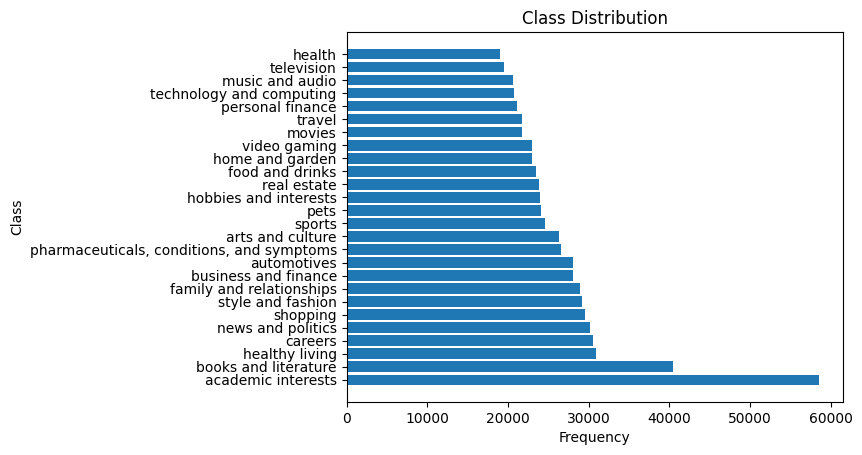

In [9]:
# Set the figure size to increase the width
# plt.figure(figsize=(12, 6))  # Adjust the width (12 inches) as needed

# Count the occurrences of each class
class_counts = train_df['target'].value_counts()

# Create a horizontal bar plot
plt.barh(class_counts.index, class_counts)

# Customize the plot
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [10]:
classes = train_df['target'].unique()
len(classes), classes

(26,
 array(['academic interests', 'arts and culture', 'automotives',
        'books and literature', 'business and finance', 'careers',
        'family and relationships', 'food and drinks', 'health',
        'healthy living', 'hobbies and interests', 'home and garden',
        'movies', 'music and audio', 'news and politics',
        'personal finance', 'pets',
        'pharmaceuticals, conditions, and symptoms', 'real estate',
        'shopping', 'sports', 'style and fashion',
        'technology and computing', 'television', 'travel', 'video gaming'],
       dtype=object))

# Dropping duplicates

In [11]:
duplicate_rows = train_df[train_df['text'].duplicated()]

In [12]:
duplicate_rows

,text,target,Word Count
7533,"BHUBANESWAR: OJEE, which is conducting the med...",academic interests,144
8443,BENGALURU: Prime Minister Narendra Modi will i...,academic interests,146
8483,AHMEDABAD: With a steady drop in COVID-19 case...,academic interests,289
8576,CHENNAI: Enrollment in University of Madras's ...,academic interests,291
14313,AMARAVATI: Andhra Pradesh Chief Minister Y.S. ...,academic interests,264
...,...,...,...
613355,be lucky in getting promotion in the current j...,family and relationships,500
613356,"be tested. With the help of patience, you migh...",family and relationships,500
613357,"go for outing with the family, which will boos...",family and relationships,500
614343,You feel no starry airs when in conversation w...,family and relationships,500


In [13]:
train_df = train_df.drop_duplicates(subset='text', keep='first', ignore_index=True)

In [14]:
train_df[train_df['text'].duplicated()]

,text,target,Word Count


No duplicates in the text anymore.

# Removing special characters:

In [15]:
import unicodedata as ucd

In [16]:
def remove_non_english_characters(text):
    return ''.join(c for c in text if ucd.category(c)[0] in ['L', 'N', 'P', 'S','Z'])


In [17]:
def get_unicode_for_chars(text):
    for char in text:
        category = ucd.category(char)[0]
        print(char, category)

In [18]:
filtered_df = train_df[train_df['text'].str.contains('To hear Ram Gopal')]

In [19]:
filtered_df

,text,target,Word Count
558047,"To hear Ram Gopal Varma say, ï¿½ï¿½ï¿½I never ...",movies,500


In [20]:
train_df.iloc[558047]

text          To hear Ram Gopal Varma say, ï¿½ï¿½ï¿½I never ...
target                                                   movies
Word Count                                                  500
Name: 558047, dtype: object

In [21]:
train_df.iloc[558047]['text'][:100]

'To hear Ram Gopal Varma say, ï¿½ï¿½ï¿½I never did a film like Rowdy,ï¿½ï¿½ï¿½ is a little confoundin'

In [22]:
remove_non_english_characters(train_df.iloc[558047]['text'][:70])

'To hear Ram Gopal Varma say, ï¿½ï¿½ï¿½I never did a film like Rowdy,ï¿'

In [23]:
get_unicode_for_chars(train_df.iloc[558047]['text'][:70])

T L
o L
  Z
h L
e L
a L
r L
  Z
R L
a L
m L
  Z
G L
o L
p L
a L
l L
  Z
V L
a L
r L
m L
a L
  Z
s L
a L
y L
, P
  Z
ï L
¿ P
½ N
ï L
¿ P
½ N
ï L
¿ P
½ N
I L
  Z
n L
e L
v L
e L
r L
  Z
d L
i L
d L
  Z
a L
  Z
f L
i L
l L
m L
  Z
l L
i L
k L
e L
  Z
R L
o L
w L
d L
y L
, P
ï L
¿ P


In [24]:
# Assuming your DataFrame is named 'df' and the text column is named 'text_column'
def remove_non_ascii_characters(text):
    return ''.join(c for c in text if ucd.category(c)[0] != 'C')

In [25]:
remove_non_ascii_characters(train_df.iloc[558047]['text'][:70])

'To hear Ram Gopal Varma say, ï¿½ï¿½ï¿½I never did a film like Rowdy,ï¿'

In [26]:
# train_df.iloc[558047]['text'][:70].replace(to_replace=r'[^\x00-\x7F]+', value='', regex=True)

In [27]:
train_df['text'] = train_df['text'].replace(to_replace=r'[^\x00-\x7F]+', value='', regex=True)

In [28]:
train_df.iloc[558047]['text'][:70]

'To hear Ram Gopal Varma say, I never did a film like Rowdy, is a littl'

The texts are free of unnecessary characters(atleast non_ASCII chars). 

# Advanced text cleaning

Link : https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

# Downsampling with same class distribution

In [29]:
# # Downsample each class
# downsampled_df = pd.DataFrame()
# df = train_df
# target_column = 'target'
# total_size = len(train_df) * 0.3

In [30]:
# Get the unique values in the target column
# classes = df[target_column].unique()

In [31]:
# # Calculate the desired number of samples for each class
# class_sizes = {cls: int(total_size * len(classes) / len(classes)) for cls in classes}

In [32]:
# # this is the modified version of the same
# original_proportions = df[target_column].value_counts(normalize=True).to_dict()
# # original_proportions
# class_sizes = {cls: int(total_size * original_proportions[cls]) for cls in classes}

In [33]:
# class_sizes

In [34]:
# # Adjust the last class if necessary to reach the total size
# THESE IS INTRODUCING A NEW DECIMAL INTO THE SAMPLE SIZE
# remaining_samples = total_size - sum(class_sizes.values())
# class_sizes[list(classes)[-1]] += remaining_samples

In [35]:
# class_sizes

In [36]:
# for cls in classes:
#     class_data = df[df[target_column] == cls]
# #     print(f'cls: {cls} \n class_sizes[cls]: {class_sizes[cls]}')
#     sampled_class = class_data.sample(n=class_sizes[cls], replace=False)
#     downsampled_df = pd.concat([downsampled_df, sampled_class])

# downsampled_df.head(7)

In [37]:
# print("Original dataset:")
# print(train_df['target'].value_counts(normalize=True))

# print("\nDownsampled dataset:")
# print(downsampled_df['target'].value_counts(normalize=True))


In [38]:
# train_df.shape, downsampled_df.shape

## into modular method

In [39]:
def downsampling_dataset(df, target_column, total_size):

    # Get the unique values in the target column
    classes = df[target_column].unique()

    # this is the modified version of the same
    original_proportions = df[target_column].value_counts(normalize=True).to_dict()
    # original_proportions
    class_sizes = {cls: int(total_size * original_proportions[cls]) for cls in classes}
    
    # Downsample each class
    downsampled_df = pd.DataFrame()
    for cls in classes:
        class_data = df[df[target_column] == cls]
    #     print(f'cls: {cls} \n class_sizes[cls]: {class_sizes[cls]}')
        sampled_class = class_data.sample(n=class_sizes[cls], replace=False)
        downsampled_df = pd.concat([downsampled_df, sampled_class])

    return downsampled_df

In [40]:
print("Original dataset:")
print(train_df['target'].value_counts(normalize=True))

# Downsample the dataset to 50% of its original size
total_size = len(train_df) * 0.3
downsampled_df = downsampling_dataset(train_df, 'target', total_size)

print("\nDownsampled dataset:")
print(downsampled_df['target'].value_counts(normalize=True))

Original dataset:
target
academic interests                           0.083918
books and literature                         0.057994
healthy living                               0.044392
careers                                      0.043417
news and politics                            0.043311
shopping                                     0.042282
style and fashion                            0.041792
family and relationships                     0.041526
business and finance                         0.040198
automotives                                  0.040157
pharmaceuticals, conditions, and symptoms    0.038162
arts and culture                             0.037799
sports                                       0.035199
pets                                         0.034612
hobbies and interests                        0.034345
real estate                                  0.034186
food and drinks                              0.033611
home and garden                              0.033004
vid

In [41]:
train_df.shape, downsampled_df.shape

((696920, 3), (209064, 3))

In [42]:
test_df = pd.read_csv(test_ds_path, encoding='ISO-8859-1')
sample_df = pd.read_csv(sample_path, encoding='ISO-8859-1')

In [43]:
test_df['text'] = test_df['text'].replace(to_replace=r'[^\x00-\x7F]+', value='', regex=True)

In [44]:
downsampled_df.to_csv('/kaggle/working/downsampled_df.csv',sep=',',index=False)
test_df.to_csv('/kaggle/working/test_df.csv',sep=',',index=False)
sample_df.to_csv('/kaggle/working/sample_df.csv',sep=',',index=False)

# Resources/ Learnings:


1. the types of unicode char

    ```
    Explanation of unicodedata.category(c)[0]

    The code unicodedata.category(c)[0] is used in Python to determine the Unicode category of a given character c. The Unicode standard categorizes characters into different groups based on their usage and properties. The returned value is a string representing the category, and the first character of this string indicates the general category.

    Here are some common Unicode categories that you might encounter:

        L: Letter
        N: Number
        P: Punctuation
        S: Symbol
        Z: Separator
        C: Other
    ```